Context :
An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market.

Columns Description :
ID : Customer's ID.

Gender : Customer's Gender (Male/Female)

Ever_Married : Marrital Statue of the Customer (Yes/No)

Age : Customer's Age

Graduated : If the Customer has Graduated or No (Yes/No)

Work_Experience : Customer's Work Experience in Years

Spending Score : Spending Score of the Customer (Low,Average,High)

Var_1 : Anonymised Category for the customer. ('Cat_1','Cat_2',..,'Cat_6')

Segmentation : Category of the Customer

In [315]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', message='The default value of `n_init` will change from 10 to \'auto\' in 1.4.')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.naive_bayes import CategoricalNB
from sklearn.feature_selection import SelectKBest, f_classif





In [320]:
Train = pd.read_csv('Train.csv')
Test = pd.read_csv('Test.csv')

# concatenate horizontally
df = pd.concat([Train, Test], axis=0)

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10695 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1002.7+ KB


In [255]:
# Drop 'ID' column
df.drop('ID', axis=1, inplace=True)

In [256]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10695 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           10695 non-null  object 
 1   Ever_Married     10505 non-null  object 
 2   Age              10695 non-null  int64  
 3   Graduated        10593 non-null  object 
 4   Profession       10533 non-null  object 
 5   Work_Experience  9597 non-null   float64
 6   Spending_Score   10695 non-null  object 
 7   Family_Size      10247 non-null  float64
 8   Var_1            10587 non-null  object 
 9   Segmentation     8068 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 919.1+ KB


<AxesSubplot: >

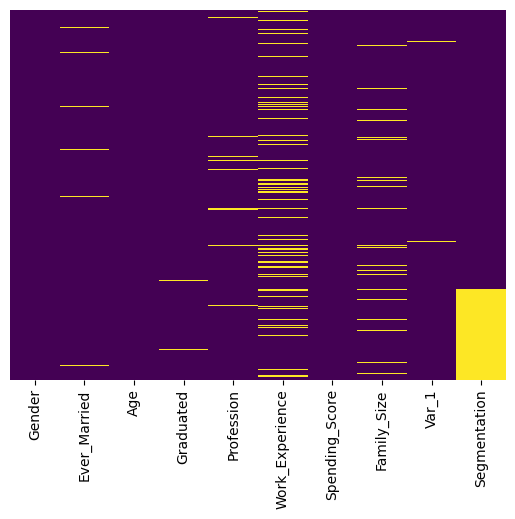

In [257]:
# Visualize missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap= 'viridis')

No correlation between missing values

In [258]:
# Check % of missing values
df.isnull().mean()*100

Gender              0.000000
Ever_Married        1.776531
Age                 0.000000
Graduated           0.953717
Profession          1.514727
Work_Experience    10.266480
Spending_Score      0.000000
Family_Size         4.188873
Var_1               1.009818
Segmentation       24.562880
dtype: float64

Since there are only 2 possible options in the Ever_Married column, we will replace all missing values with either a Yes/No.

In [259]:
# Count the number of missing values in the Ever_Married column
num_missing = df['Ever_Married'].isna().sum()

# Generate an equal number of 'yes' and 'no' values
fill_values = np.random.choice(['Yes', 'No'], num_missing)

# Replace the missing values with the generated values
df.loc[df['Ever_Married'].isna(), 'Ever_Married'] = fill_values

In [260]:
# Check for missing values in the Ever_Married column
df['Ever_Married'].isna().sum()

0

We will repeat the steps for the Graduated column: replcing all missing values with either a Yes/No

In [261]:
# Count the number of missing values in the 'Graduated' column
num_missing = df['Graduated'].isna().sum()

# Generate an equal number of 'Yes' and 'No' values
fill_values = np.random.choice(['Yes', 'No'], num_missing)

# Replace the missing values in the 'Graduated' column
df.loc[df['Graduated'].isna(), 'Graduated'] = fill_values

In [262]:
# Check for missing values in the 'Graduated' column
df['Graduated'].isna().sum()

0

In [263]:
df.isnull().mean()*100

Gender              0.000000
Ever_Married        0.000000
Age                 0.000000
Graduated           0.000000
Profession          1.514727
Work_Experience    10.266480
Spending_Score      0.000000
Family_Size         4.188873
Var_1               1.009818
Segmentation       24.562880
dtype: float64

In [264]:
# Check the count of each category in the 'Profession' column
df['Profession'].value_counts()

Artist           3318
Healthcare       1750
Entertainment    1250
Engineer          935
Doctor            930
Lawyer            844
Executive         775
Marketing         403
Homemaker         328
Name: Profession, dtype: int64

Missing values in Profession column are only 1.5% so we will replace with most common value

In [265]:
# Replace missing values with most frequent category
df['Profession'].fillna('Artist', inplace=True)

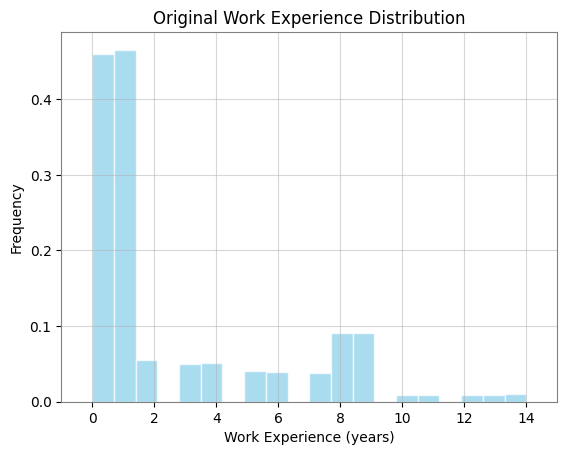

In [266]:
# Visualize Work Experience data distribution using histogram

ax = df["Work_Experience"].hist(bins=20, density=True, stacked=True, color='skyblue', alpha=0.7, edgecolor='white')
ax.set(xlabel='Work Experience (years)', ylabel='Frequency', title='Original Work Experience Distribution')

# Add light gridlines
plt.grid(alpha=0.5)

# Set outlines to white
for spine in ax.spines.values():
    spine.set_edgecolor('grey')

ax.spines['left'].set_edgecolor('grey')
ax.spines['bottom'].set_edgecolor('grey')

plt.xlim(-1,15)
plt.show()


In [267]:
# How many missing values are there in the 'Work_Experience' column?
num_missing = df['Work_Experience'].isna().sum()
num_missing


1098

To fill missing values in work_experience, we first find the most common value of work experience for each profession. 
Then, the missing values are then filled with the most common value for each profession.

In [268]:
# Group the data by Profession and calculate the mode of Work Experience for each group
mode_work_experience_by_profession = df.groupby('Profession')['Work_Experience'].apply(lambda x: x.mode()[0]).reset_index()

# Fill missing values of Work Experience with mode for each profession
df = df.merge(mode_work_experience_by_profession, on='Profession', how='left', suffixes=['', '_mode'])
df['Work_Experience'] = df['Work_Experience'].fillna(df['Work_Experience_mode'])
df = df.drop(columns=['Work_Experience_mode'])

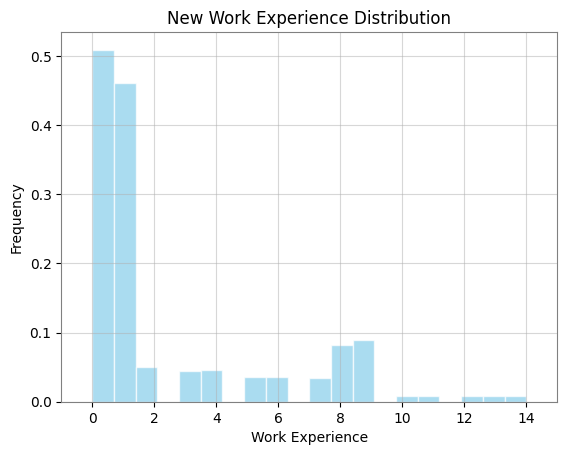

In [269]:
# New Work Experience distribution

# Visualize Work Experience data distribution using histogram

ax = df["Work_Experience"].hist(bins=20, density=True, stacked=True, color='skyblue', alpha=0.7, edgecolor='white')
ax.set(xlabel='Work Experience (years)', ylabel='Frequency', title='New Work Experience Distribution')
ax.set(xlabel='Work Experience')

# Add light gridlines
plt.grid(alpha=0.5)

# Set outlines to white
for spine in ax.spines.values():
    spine.set_edgecolor('grey')

ax.spines['left'].set_edgecolor('grey')
ax.spines['bottom'].set_edgecolor('grey')

plt.xlim(-1,15)
plt.show()

Data distribution is largely unchanged

In [270]:
# check range of values in work experience column
df['Work_Experience'].value_counts()

0.0     3809
1.0     3452
9.0      664
8.0      612
2.0      373
4.0      346
3.0      337
5.0      270
6.0      265
7.0      256
14.0      66
10.0      64
11.0      64
12.0      60
13.0      57
Name: Work_Experience, dtype: int64

We want to reduce the number of categories in the 'Work_Experience' column 


In [271]:
# #%% [disabled]

# # Define the work experience brackets
# bins = [-1, 3, 7, 11, float('inf')]
# labels = ['0-3', '4-7', '8-11', '12+']

# # Bin the work experience into the brackets and create a new column
# df['Work_Experience_Range'] = pd.cut(df['Work_Experience'], bins=bins, labels=labels)

In [272]:
# # Check for missing values in the 'Work_Experience' column
# df['Work_Experience_Range'].isna().sum()

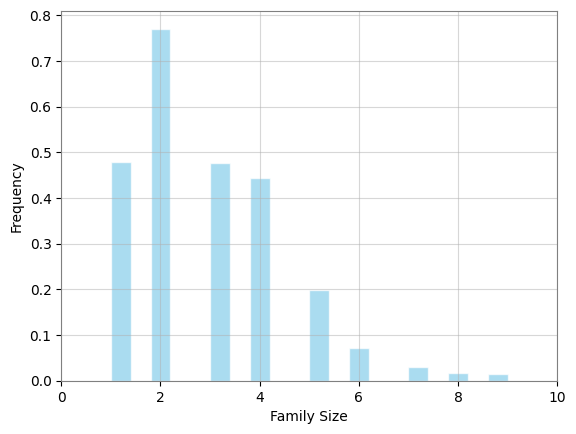

In [273]:
# Visualize  data distribution of 'Family_Size' column

ax = df["Family_Size"].hist(bins=20, density=True, stacked=True, color='skyblue', alpha=0.7, edgecolor='white')
ax.set(xlabel='Family Size', ylabel='Frequency')

# Add light gridlines
plt.grid(alpha=0.5)

# Set outlines to white
for spine in ax.spines.values():
    spine.set_edgecolor('grey')

ax.spines['left'].set_edgecolor('grey')
ax.spines['bottom'].set_edgecolor('grey')

plt.xlim(0,10)
plt.show()

In [274]:
# Apply Time series imputation 
# Using ffill method to fill missing values with next observed value

df['Family_Size'] = df['Family_Size'].fillna(method='ffill')

In [275]:
# check for missing values in the 'Family_Size' column
df['Family_Size'].isna().sum()

0

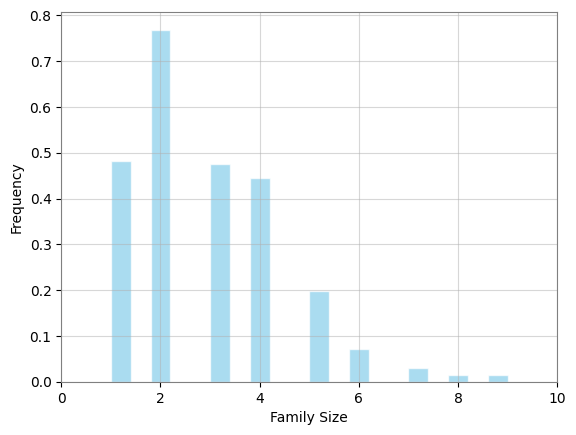

In [276]:
# Check new data distribution of 'Family_Size' column

ax = df["Family_Size"].hist(bins=20, density=True, stacked=True, color='skyblue', alpha=0.7, edgecolor='white')
ax.set(xlabel='Family Size', ylabel='Frequency')

# Add light gridlines
plt.grid(alpha=0.5)

# Set outlines to white
for spine in ax.spines.values():
    spine.set_edgecolor('grey')

ax.spines['left'].set_edgecolor('grey')
ax.spines['bottom'].set_edgecolor('grey')

plt.xlim(0,10)
plt.show()

Data distribution maintained

In [277]:
# Check for number of unique values in each column
df.nunique()

Gender              2
Ever_Married        2
Age                67
Graduated           2
Profession          9
Work_Experience    15
Spending_Score      3
Family_Size         9
Var_1               7
Segmentation        4
dtype: int64

In [278]:
# Check the range of vlues for age column
df['Age'].min(), df['Age'].max()

(18, 89)

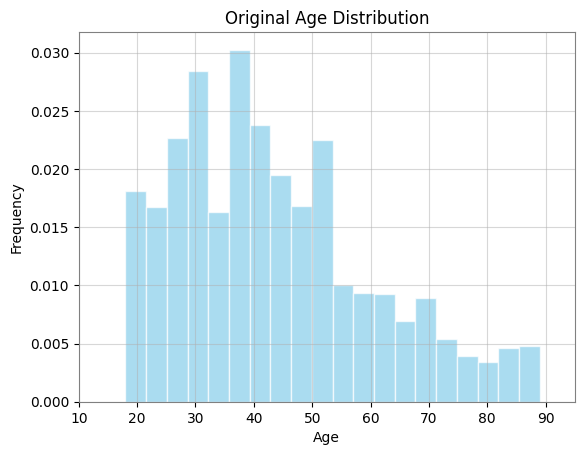

In [279]:
# Visualize Age data distribution using histogram

ax = df["Age"].hist(bins=20, density=True, stacked=True, color='skyblue', alpha=0.7, edgecolor='white')
ax.set(xlabel='Age', ylabel='Frequency', title='Original Age Distribution')

# Add light gridlines
plt.grid(alpha=0.5)

# Set outlines to white
for spine in ax.spines.values():
    spine.set_edgecolor('grey')

ax.spines['left'].set_edgecolor('grey')
ax.spines['bottom'].set_edgecolor('grey')

plt.xlim(10,95)
plt.show()


We want to reduce the number of unique values in the age range.
We want more granularity in the 20-50 age range as that is where the data is concentrated so more age brackets will be included in that region

In [280]:
# # # Define the age brackets
# bins = [17, 25, 35, 45, 55, 70, float('inf')]
# labels = ['18-24', '25-34', '35-44', '45-54', '55-69', '70+']

# # Bin the ages into the brackets and create a new column
# df['Age_Bracket'] = pd.cut(df['Age'], bins=bins, labels=labels)


In [281]:
# # # Plot distribution of Age_Bracket column
# ax = df['Age_Bracket'].value_counts().plot(kind='bar', figsize=(8, 5), color='skyblue', edgecolor='white')
# ax.grid(which='major', axis='y', color='grey', alpha=0.5, linestyle='--')
# ax.set_title('New Age Distribution', fontsize=12)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
# ax.set_xlabel('Age Group', fontsize=12)
# ax.set_ylabel('Frequency', fontsize=12)



In [282]:
# # # We can now drop the 'Age' column
# df.drop('Age', axis=1, inplace=True)

In [283]:
# check for percentage of missing values in all columns
df.isnull().mean()*100

Gender              0.000000
Ever_Married        0.000000
Age                 0.000000
Graduated           0.000000
Profession          0.000000
Work_Experience     0.000000
Spending_Score      0.000000
Family_Size         0.000000
Var_1               1.009818
Segmentation       24.562880
dtype: float64

In [284]:
# Fill missing values of 'Var_1' column with most frequent value
df['Var_1'].fillna(df['Var_1'].mode()[0], inplace=True)

In [285]:
# Check for missing values in all columns
df.isna().sum()

Gender                0
Ever_Married          0
Age                   0
Graduated             0
Profession            0
Work_Experience       0
Spending_Score        0
Family_Size           0
Var_1                 0
Segmentation       2627
dtype: int64

Exploratory Analysis

In [286]:
df['Segmentation'].value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

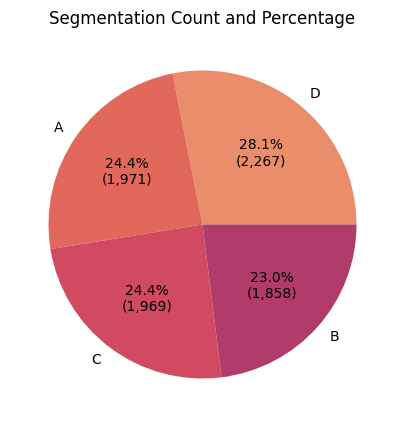

In [287]:
# Calculate the count and percentage of each segment
seg_count = df['Segmentation'].value_counts()
seg_pct = seg_count / seg_count.sum() * 100

sns.set_palette('flare')

# Create the pie chart with percentage labels
plt.figure(figsize=(8,5))
plt.pie(seg_count, labels=seg_count.index, autopct=lambda x: f'{x:.1f}%\n({int(x/100*seg_count.sum()):,})')
plt.title("Segmentation Count and Percentage")
plt.show()

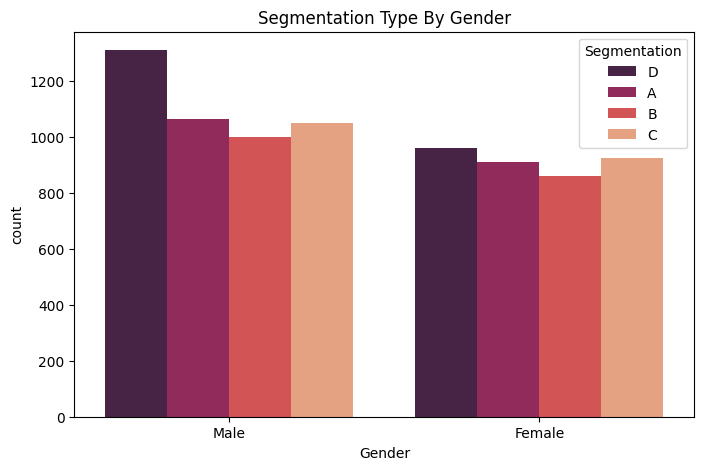

In [288]:
# Check segmentation type by Gender
plt.figure(figsize=(8,5))
sns.countplot(x='Gender', hue = 'Segmentation', data=df, palette='rocket')
plt.title("Segmentation Type By Gender")
plt.show()

Mostly even distribution between male/female with a slight skew towards male

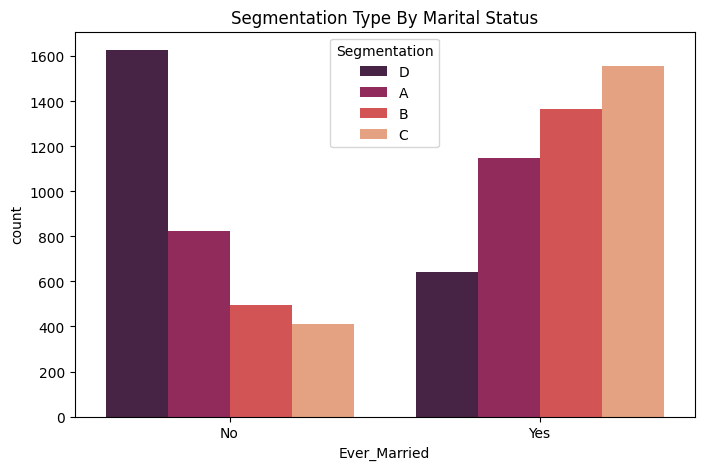

In [289]:
# Check segmentaion by Marital Status
plt.figure(figsize=(8,5))
sns.countplot(x='Ever_Married', hue = 'Segmentation', data=df, palette='rocket')
plt.title("Segmentation Type By Marital Status")
plt.show()

More data is available for married customers which is in line with expectations as they tend to be more financially secure and likley to purchase a vehicle.

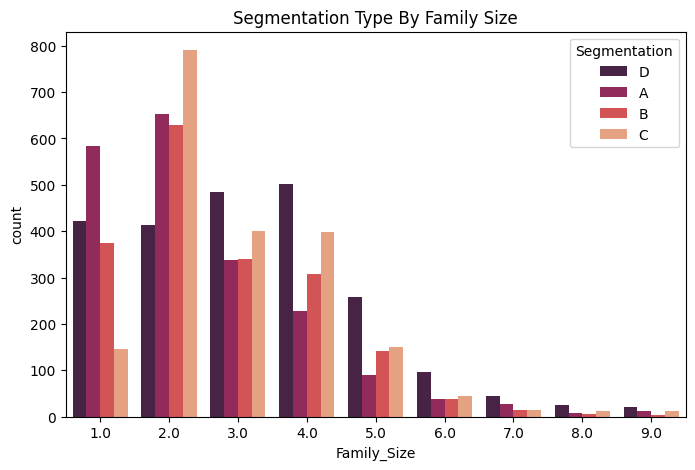

In [290]:
# Check segmentaion by Family Size
plt.figure(figsize=(8,5))
sns.countplot(x='Family_Size', hue = 'Segmentation', data=df, palette='rocket')
plt.title("Segmentation Type By Family Size")
plt.show()

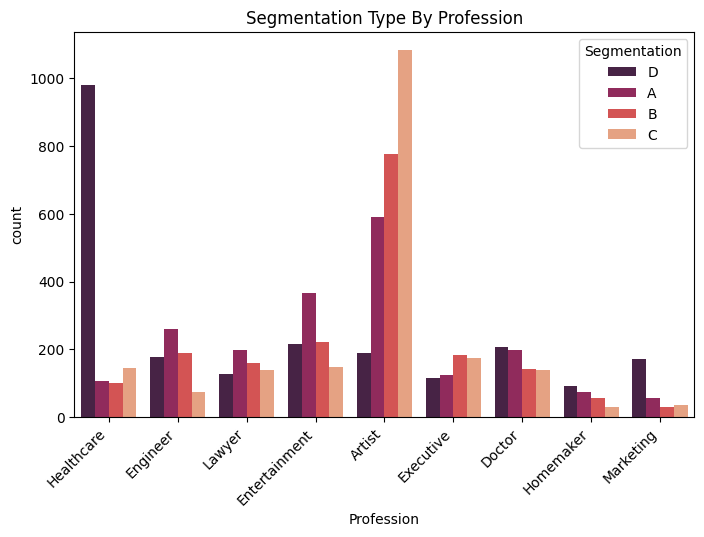

In [291]:
# Check segmentaion by Profession

sns.set_palette('rocket')
plt.figure(figsize=(8,5))
ax = sns.countplot(x='Profession', hue='Segmentation', data=df, palette='rocket')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title("Segmentation Type By Profession")
plt.show()

In [292]:
# Check segmentaion by Age Bracket

sns.set_palette('rocket')
plt.figure(figsize=(8,5))
ax = sns.countplot(x='Age_Bracket', hue='Segmentation', data=df, palette='rocket')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title("Segmentation Type By Age")
plt.show()

ValueError: Could not interpret input 'Age_Bracket'

<Figure size 800x500 with 0 Axes>

We can see a clear shift in the segmentation category with increasing age.


In [293]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,0.0,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,A


In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10695 entries, 0 to 10694
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           10695 non-null  object 
 1   Ever_Married     10695 non-null  object 
 2   Age              10695 non-null  int64  
 3   Graduated        10695 non-null  object 
 4   Profession       10695 non-null  object 
 5   Work_Experience  10695 non-null  float64
 6   Spending_Score   10695 non-null  object 
 7   Family_Size      10695 non-null  float64
 8   Var_1            10695 non-null  object 
 9   Segmentation     8068 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 919.1+ KB


In [295]:
df.isna().sum()

Gender                0
Ever_Married          0
Age                   0
Graduated             0
Profession            0
Work_Experience       0
Spending_Score        0
Family_Size           0
Var_1                 0
Segmentation       2627
dtype: int64

We will now split the data into test set using the missing values in the segmentation column

In [296]:
# Create a new df using the missing values in the 'Segmentation' column
test_df = df[df['Segmentation'].isna()]


In [297]:
# Create a train df using the non-missing values in the 'Segmentation' column
train_df = df[df['Segmentation'].notna()]

In [298]:
# check for missing values in df
train_df.isna().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [299]:
# check for missing values in test data
test_df.isna().sum()

Gender                0
Ever_Married          0
Age                   0
Graduated             0
Profession            0
Work_Experience       0
Spending_Score        0
Family_Size           0
Var_1                 0
Segmentation       2627
dtype: int64

Normalizing data

In [300]:
# Select columns of type 'int64' and 'float64'
cols_to_normalize = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create a scaler object
scaler = MinMaxScaler()

# Normalize the selected columns
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

Encoding

In [301]:
# Label encode categorical + object columns
le = LabelEncoder()

# Train data
# Encode obejct and category columns
enc_train_df = train_df.select_dtypes(include=['object', 'category']).copy()
train_df[enc_train_df.columns] = enc_train_df.apply(lambda x: le.fit_transform(x.astype(str)))

# Test data
# Encode obejct and category columns
enc_test_df = test_df.select_dtypes(include=['object', 'category']).copy()
test_df[enc_test_df.columns] = enc_test_df.apply(lambda x: le.fit_transform(x.astype(str)))


C:\Users\ibmmo\AppData\Local\Temp\ipykernel_23068\1242618854.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[enc_train_df.columns] = enc_train_df.apply(lambda x: le.fit_transform(x.astype(str)))
C:\Users\ibmmo\AppData\Local\Temp\ipykernel_23068\1242618854.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[enc_test_df.columns] = enc_test_df.apply(lambda x: le.fit_transform(x.astype(str)))


In [302]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2627 entries, 8068 to 10694
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           2627 non-null   int32  
 1   Ever_Married     2627 non-null   int32  
 2   Age              2627 non-null   int64  
 3   Graduated        2627 non-null   int32  
 4   Profession       2627 non-null   int32  
 5   Work_Experience  2627 non-null   float64
 6   Spending_Score   2627 non-null   int32  
 7   Family_Size      2627 non-null   float64
 8   Var_1            2627 non-null   int32  
 9   Segmentation     2627 non-null   int32  
dtypes: float64(2), int32(7), int64(1)
memory usage: 153.9 KB


In [303]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   int32  
 1   Ever_Married     8068 non-null   int32  
 2   Age              8068 non-null   int64  
 3   Graduated        8068 non-null   int32  
 4   Profession       8068 non-null   int32  
 5   Work_Experience  8068 non-null   float64
 6   Spending_Score   8068 non-null   int32  
 7   Family_Size      8068 non-null   float64
 8   Var_1            8068 non-null   int32  
 9   Segmentation     8068 non-null   int32  
dtypes: float64(2), int32(7), int64(1)
memory usage: 472.7 KB


All data is now numerical

In [304]:
# Decision Tree Classifier

# Split the data into train and test sets
x_train = train_df.drop('Segmentation', axis=1)
y_train = train_df['Segmentation']

# Train the decision tree model
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

# Predict the target values for the test data
x_test = test_df.drop('Segmentation', axis=1)
y_test = test_df['Segmentation']
y_pred = dt.predict(x_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.26      0.41      2627
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.26      2627
   macro avg       0.25      0.06      0.10      2627
weighted avg       1.00      0.26      0.41      2627

[[679 630 596 722]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]]


C:\Users\ibmmo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ibmmo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ibmmo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetri

In [305]:
# Round 2

# Decision Tree Classifier with improved parameters

# Split the data into train and test sets
x_train = train_df.drop('Segmentation', axis=1)
y_train = train_df['Segmentation']
x_test = test_df.drop('Segmentation', axis=1)
y_test = test_df['Segmentation']

# Train the decision tree model with improved parameters
dt = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=1, min_samples_leaf=1)
dt.fit(x_train, y_train)

# Predict the target values for the test data
y_pred = dt.predict(x_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.33      0.50      2627
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.33      2627
   macro avg       0.25      0.08      0.12      2627
weighted avg       1.00      0.33      0.50      2627

[[871 392 589 775]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]]


C:\Users\ibmmo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ibmmo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ibmmo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetri

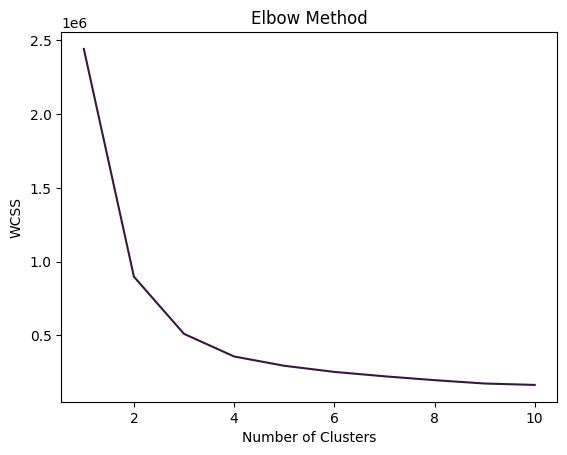

In [306]:
# K-mean Clustering

# Determine the optimal number of clusters using the elbow method
X = train_df.drop('Segmentation', axis=1)

# Calculate the within-cluster sum of squares for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

4 clusters

In [317]:
# Extract the features to be used for clustering
features = ['Age',  'Graduated', 'Profession', 'Spending_Score', 'Gender', 'Ever_Married']
x_train = train_df[features]

# Train the K-means clustering model
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x_train)

# Predict the clusters for the test data
x_test = test_df[features]
y_pred = kmeans.predict(x_test)

# Evaluate the model

# Calculate silhouette score and Calinski-Harabasz index to assess clustering quality
from sklearn.metrics import silhouette_score, calinski_harabasz_score
print("Silhouette score:", silhouette_score(x_train, kmeans.labels_))
print("Calinski-Harabasz index:", calinski_harabasz_score(x_train, kmeans.labels_))

Silhouette score: 0.4911007480369208
Calinski-Harabasz index: 23448.37536096388


In [316]:
# Extract the features and target variable
X = train_df.drop('Segmentation', axis=1)
y = train_df['Segmentation']

# Perform univariate feature selection
selector = SelectKBest(f_classif, k=5)
selector.fit(X, y)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Use the selected features for clustering
selected_features = X.columns[selected_indices]
x_train = train_df[selected_features]

# Train the K-means clustering model
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x_train)

# Predict the clusters for the test data
x_test = test_df[selected_features]
y_pred = kmeans.predict(x_test)

# Evaluate the model
print("Silhouette score:", silhouette_score(x_train, kmeans.labels_))
print("Calinski-Harabasz index:", calinski_harabasz_score(x_train, kmeans.labels_))

Silhouette score: 0.49429444195930594
Calinski-Harabasz index: 23646.1840483677


In [318]:
# Define the function to predict segment
def predict_segment():
    # Prompt the user for input
    age = input("Enter age: ")
    gender = input("Enter gender (Male/Female): ")
    ever_married = input("Ever married (Yes/No): ")
    graduated = input("Graduated (Yes/No): ")
    profession = input("Profession (Artist/Doctor/Engineer/Entertainment/Executive/Homemaker/Lawyer/Marketing/None/Other): ")
    spending_score = input("Spending score (Average/High/Very High): ")
    family_size = input("Family size: ")
    
    # Create a DataFrame with the user input
    user_data = pd.DataFrame({
        'Age': [int(age)],
        'Gender': [gender],
        'Ever_Married': [ever_married],
        'Graduated': [graduated],
        'Profession': [profession],
        'Spending_Score': [spending_score],
        'Family_Size': [int(family_size)]
    })

    # Encode categorical variables using the same encoder used in the model training
    user_data_encoded = encoder.transform(user_data)
    
    # Make the prediction
    segment = model.predict(user_data_encoded)[0]
    
    # Print the predicted segment
    print("Predicted segment:", segment)

In [319]:
predict_segment()

NameError: name 'encoder' is not defined